In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [55]:
# Examine your data
train.head()

,Customer_ID,Sex,Earnings,Region_Code,Marital Status,State_of_Origin,Customer_Worth,Customer_Reply,Plan,Certification,...,Vehicle Class,Vehicle Size,Months Since Last Claim,Months Since Policy Inception,Counts_of_Open_Complaints,No_Of_POlicy,kind_of_policy,Active_Policy,Sales Channel,Best_Offer
0,Customer_434,Female,97134,Suburban,Single,Kano,5017.009472,Interested,Silver,First_Degree,...,SUV,Medsize,12,15,0,1,Corporate,C_L2,Agent,1
1,Customer_4641,Female,53754,Suburban,Married,Abuja,5151.301306,Not_interested,Silver,First_Degree,...,SUV,Small,5,2,0,1,Personal,P_L2,Agent,3
2,Customer_4952,Female,25804,Suburban,Divorced,Lagos,4906.894731,Interested,Silver,HND,...,Sports Car,Medsize,3,51,0,1,Personal,P_L3,Agent,0
3,Customer_1489,Female,0,Suburban,Single,Imo,8512.525936,Not_interested,Silver,HND,...,Sports Car,Medsize,5,94,0,8,Personal,P_L2,Branch,1
4,Customer_812,Male,140494,Rural,Single,Imo,3280.531880,Not_interested,Silver,PHD,...,Four-Door Car,Medsize,13,19,2,1,Personal,P_L2,Call Center,3


In [56]:
# Check relationship between columns
train.corr()

,Earnings,Customer_Worth,Premium_Auto_per_Month,Total Claim Amount,Months Since Last Claim,Months Since Policy Inception,Counts_of_Open_Complaints,No_Of_POlicy,Best_Offer
Earnings,1.000000,0.021600,-0.021647,-0.355120,-0.018953,0.000156,0.011088,-0.004603,0.140847
Customer_Worth,0.021600,1.000000,0.397330,0.236922,0.012501,0.022831,-0.044684,0.022783,-0.075192
Premium_Auto_per_Month,-0.021647,0.397330,1.000000,0.634102,0.002220,0.020411,-0.015891,-0.013794,-0.080059
Total Claim Amount,-0.355120,0.236922,0.634102,1.000000,0.004859,0.004426,-0.013676,-0.000745,-0.101028
Months Since Last Claim,-0.018953,0.012501,0.002220,0.004859,1.000000,-0.042053,-0.004648,0.001456,-0.001296
Months Since Policy Inception,0.000156,0.022831,0.020411,0.004426,-0.042053,1.000000,-0.004945,-0.008449,-0.088650
Counts_of_Open_Complaints,0.011088,-0.044684,-0.015891,-0.013676,-0.004648,-0.004945,1.000000,-0.017468,-0.028014
No_Of_POlicy,-0.004603,0.022783,-0.013794,-0.000745,0.001456,-0.008449,-0.017468,1.000000,-0.079268
Best_Offer,0.140847,-0.075192,-0.080059,-0.101028,-0.001296,-0.088650,-0.028014,-0.079268,1.000000


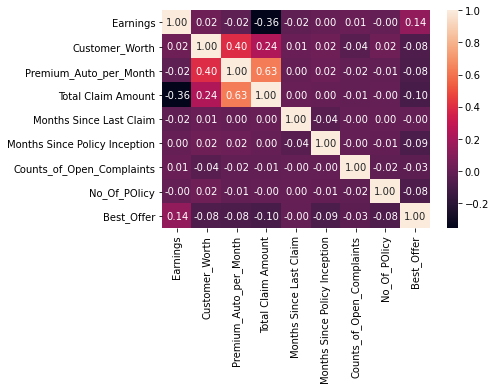

In [4]:
# i see better with heatmaps... it's colorful
sns.heatmap(train.corr(), annot=True, fmt=".2f");

In [57]:
# be certain there are no null values
np.sum(train.isnull())

Customer_ID                      0
Sex                              0
Earnings                         0
Region_Code                      0
Marital Status                   0
State_of_Origin                  0
Customer_Worth                   0
Customer_Reply                   0
Plan                             0
Certification                    0
Effective To Date                0
Status_of_Employment             0
Premium_Auto_per_Month           0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
Months Since Last Claim          0
Months Since Policy Inception    0
Counts_of_Open_Complaints        0
No_Of_POlicy                     0
kind_of_policy                   0
Active_Policy                    0
Sales Channel                    0
Best_Offer                       0
dtype: int64

In [58]:
# check the datatypes of the columns, to see the distribution of categorical and numerical values
train.dtypes

Customer_ID                       object
Sex                               object
Earnings                           int64
Region_Code                       object
Marital Status                    object
State_of_Origin                   object
Customer_Worth                   float64
Customer_Reply                    object
Plan                              object
Certification                     object
Effective To Date                 object
Status_of_Employment              object
Premium_Auto_per_Month             int64
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
Months Since Last Claim            int64
Months Since Policy Inception      int64
Counts_of_Open_Complaints          int64
No_Of_POlicy                       int64
kind_of_policy                    object
Active_Policy                     object
Sales Channel                     object
Best_Offer                         int64
dtype: object

In [59]:
# create separate dataframes for the categorical and numerical values
ints = train.select_dtypes(include=['float64', 'int64'])
cats = train.select_dtypes(include=['object'])

In [60]:
print('ints:', ints.shape)
print('cats:', cats.shape)

ints: (6393, 9)
cats: (6393, 15)


In [61]:
ints.head()

,Earnings,Customer_Worth,Premium_Auto_per_Month,Total Claim Amount,Months Since Last Claim,Months Since Policy Inception,Counts_of_Open_Complaints,No_Of_POlicy,Best_Offer
0,97134,5017.009472,260,624.000000,12,15,0,1,1
1,53754,5151.301306,262,628.800000,5,2,0,1,3
2,25804,4906.894731,278,667.200000,3,51,0,1,0
3,0,8512.525936,242,871.200000,5,94,0,8,1
4,140494,3280.531880,166,141.799422,13,19,2,1,3


In [62]:
# select features for model predictions
X = ints.drop(['Best_Offer'], axis=1)
y = ints['Best_Offer']

In [63]:
X.head()

,Earnings,Customer_Worth,Premium_Auto_per_Month,Total Claim Amount,Months Since Last Claim,Months Since Policy Inception,Counts_of_Open_Complaints,No_Of_POlicy
0,97134,5017.009472,260,624.000000,12,15,0,1
1,53754,5151.301306,262,628.800000,5,2,0,1
2,25804,4906.894731,278,667.200000,3,51,0,1
3,0,8512.525936,242,871.200000,5,94,0,8
4,140494,3280.531880,166,141.799422,13,19,2,1


In [64]:
# first model... you can use any model of your choice
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

preds1 = model.predict(X_test)
preds2 = model.predict(X_train)
print('done')

print(accuracy_score(y_test, preds1))

done
0.4614181438998957


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
# 2nd model... lets see how this model performs
# again... you can use any model of your choice
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

model2 = RandomForestClassifier()
model2.fit(X_train, y_train)

preds1 = model2.predict(X_test)
preds2 = model2.predict(X_train)
print('done')

print(accuracy_score(y_test, preds1))

done
0.5020855057351408


In [65]:
# examining the dataframe of the categorical variables created earlier
cats.head()

,Customer_ID,Sex,Region_Code,Marital Status,State_of_Origin,Customer_Reply,Plan,Certification,Effective To Date,Status_of_Employment,Vehicle Class,Vehicle Size,kind_of_policy,Active_Policy,Sales Channel
0,Customer_434,Female,Suburban,Single,Kano,Interested,Silver,First_Degree,3/2/2011,Fully_Employed,SUV,Medsize,Corporate,C_L2,Agent
1,Customer_4641,Female,Suburban,Married,Abuja,Not_interested,Silver,First_Degree,1/22/11,Fully_Employed,SUV,Small,Personal,P_L2,Agent
2,Customer_4952,Female,Suburban,Divorced,Lagos,Interested,Silver,HND,2/14/11,In_Retirement,Sports Car,Medsize,Personal,P_L3,Agent
3,Customer_1489,Female,Suburban,Single,Imo,Not_interested,Silver,HND,8/1/2011,Not_employed,Sports Car,Medsize,Personal,P_L2,Branch
4,Customer_812,Male,Rural,Single,Imo,Not_interested,Silver,PHD,2/19/11,Fully_Employed,Four-Door Car,Medsize,Personal,P_L2,Call Center


In [66]:
# dealing with the categorical variable by encoding them

objs = cats.copy()
objs = objs.drop(["Customer_ID"], axis=1)
for obj in  objs:
    # for each cat add dummy var, drop original column
    df = pd.concat([objs.drop(obj, axis=1), pd.get_dummies(objs, prefix=obj, prefix_sep='_', drop_first=True)], axis=1)

df.head()

,Sex,Region_Code,Marital Status,State_of_Origin,Customer_Reply,Plan,Certification,Effective To Date,Status_of_Employment,Vehicle Class,...,Sales Channel_C_L3,Sales Channel_P_L1,Sales Channel_P_L2,Sales Channel_P_L3,Sales Channel_S_L1,Sales Channel_S_L2,Sales Channel_S_L3,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web
0,Female,Suburban,Single,Kano,Interested,Silver,First_Degree,3/2/2011,Fully_Employed,SUV,...,0,0,0,0,0,0,0,0,0,0
1,Female,Suburban,Married,Abuja,Not_interested,Silver,First_Degree,1/22/11,Fully_Employed,SUV,...,0,0,1,0,0,0,0,0,0,0
2,Female,Suburban,Divorced,Lagos,Interested,Silver,HND,2/14/11,In_Retirement,Sports Car,...,0,0,0,1,0,0,0,0,0,0
3,Female,Suburban,Single,Imo,Not_interested,Silver,HND,8/1/2011,Not_employed,Sports Car,...,0,0,1,0,0,0,0,1,0,0
4,Male,Rural,Single,Imo,Not_interested,Silver,PHD,2/19/11,Fully_Employed,Four-Door Car,...,0,0,1,0,0,0,0,0,1,0


In [67]:
# removing columns already encoded with dummies

df = df.select_dtypes(exclude=['object'])
df.dtypes

Sales Channel_Male           uint8
Sales Channel_Suburban       uint8
Sales Channel_Urban          uint8
Sales Channel_Married        uint8
Sales Channel_Single         uint8
                             ...  
Sales Channel_S_L2           uint8
Sales Channel_S_L3           uint8
Sales Channel_Branch         uint8
Sales Channel_Call Center    uint8
Sales Channel_Web            uint8
Length: 98, dtype: object

In [68]:
#a new dataframe with all the integer values and the encoded categorical values

result = pd.concat([df, ints], axis=1, join='inner')
result.shape

(6393, 107)

In [69]:
result.head()

,Sales Channel_Male,Sales Channel_Suburban,Sales Channel_Urban,Sales Channel_Married,Sales Channel_Single,Sales Channel_Enugu,Sales Channel_Imo,Sales Channel_Kano,Sales Channel_Lagos,Sales Channel_Not_interested,...,Sales Channel_Web,Earnings,Customer_Worth,Premium_Auto_per_Month,Total Claim Amount,Months Since Last Claim,Months Since Policy Inception,Counts_of_Open_Complaints,No_Of_POlicy,Best_Offer
0,0,1,0,0,1,0,0,1,0,0,...,0,97134,5017.009472,260,624.000000,12,15,0,1,1
1,0,1,0,1,0,0,0,0,0,1,...,0,53754,5151.301306,262,628.800000,5,2,0,1,3
2,0,1,0,0,0,0,0,0,1,0,...,0,25804,4906.894731,278,667.200000,3,51,0,1,0
3,0,1,0,0,1,0,1,0,0,1,...,0,0,8512.525936,242,871.200000,5,94,0,8,1
4,1,0,0,0,1,0,1,0,0,1,...,0,140494,3280.531880,166,141.799422,13,19,2,1,3


In [74]:
# trying the new concatenated dataframe on a model

from sklearn.ensemble import RandomForestClassifier

X2 = result.drop(['Best_Offer'], axis=1)
y2 = result['Best_Offer']
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=.3, random_state=42)

model3 = RandomForestClassifier()
model3.fit(X_train, y_train)

preds1 = model3.predict(X_test)
preds2 = model3.predict(X_train)
print('done')

print(accuracy_score(y_test, preds1))

done
0.5333680917622523


In [86]:
from sklearn.ensemble import GradientBoostingClassifier

X2 = result.drop(['Best_Offer'], axis=1)
y2 = result['Best_Offer']
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=.3, random_state=42)

model4 = GradientBoostingClassifier()
model4.fit(X_train, y_train)

preds1 = model4.predict(X_test)
preds2 = model4.predict(X_train)
print('done')

print(accuracy_score(y_test, preds1))

done
0.5151199165797706


In [75]:
# time to deal with our test data
test.columns

Index(['Customer_ID', 'Sex', 'Earnings', 'Region_Code', 'Marital Status',
       'State_of_Origin', 'Customer_Worth', 'Customer_Reply', 'Plan',
       'Certification', 'Effective To Date', 'Status_of_Employment',
       'Premium_Auto_per_Month', 'Total Claim Amount', 'Vehicle Class',
       'Vehicle Size', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Counts_of_Open_Complaints',
       'No_Of_POlicy', 'kind_of_policy', 'Active_Policy', 'Sales Channel'],
      dtype='object')

In [76]:
test_ints = test.select_dtypes(include=['float64', 'int64'])
test_cats = test.select_dtypes(include=['object'])

In [77]:
test_objs = test_cats.copy()
test_objs = test_objs.drop(["Customer_ID"], axis=1)
for obj in  test_objs:
    test_df = pd.concat([test_objs.drop(obj, axis=1), pd.get_dummies(test_objs, prefix=obj, prefix_sep='_', drop_first=True)], axis=1)

test_df.head()

,Sex,Region_Code,Marital Status,State_of_Origin,Customer_Reply,Plan,Certification,Effective To Date,Status_of_Employment,Vehicle Class,...,Sales Channel_C_L3,Sales Channel_P_L1,Sales Channel_P_L2,Sales Channel_P_L3,Sales Channel_S_L1,Sales Channel_S_L2,Sales Channel_S_L3,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web
0,Male,Rural,Married,Lagos,Not_interested,Bronze,O_Level,1/17/11,Fully_Employed,SUV,...,0,0,0,1,0,0,0,0,0,0
1,Female,Suburban,Single,Abuja,Not_interested,Bronze,O_Level,2/1/2011,Fully_Employed,Two-Door Car,...,0,0,1,0,0,0,0,0,0,0
2,Female,Suburban,Married,Abuja,Interested,Silver,HND,1/28/11,Fully_Employed,Two-Door Car,...,0,0,0,1,0,0,0,0,0,0
3,Female,Urban,Married,Lagos,Not_interested,Silver,HND,9/2/2011,Fully_Employed,Four-Door Car,...,0,0,0,1,0,0,0,1,0,0
4,Female,Suburban,Divorced,Kano,Not_interested,Bronze,O_Level,2/20/11,Disabled,Four-Door Car,...,0,0,1,0,0,0,0,1,0,0


In [78]:
test_df = test_df.select_dtypes(exclude=['object'])
test_df.dtypes

Sales Channel_Male           uint8
Sales Channel_Suburban       uint8
Sales Channel_Urban          uint8
Sales Channel_Married        uint8
Sales Channel_Single         uint8
                             ...  
Sales Channel_S_L2           uint8
Sales Channel_S_L3           uint8
Sales Channel_Branch         uint8
Sales Channel_Call Center    uint8
Sales Channel_Web            uint8
Length: 98, dtype: object

In [79]:
test_result = pd.concat([test_df, test_ints], axis=1, join='inner')
test_result.shape

(2741, 106)

In [80]:
test_result.head()

,Sales Channel_Male,Sales Channel_Suburban,Sales Channel_Urban,Sales Channel_Married,Sales Channel_Single,Sales Channel_Enugu,Sales Channel_Imo,Sales Channel_Kano,Sales Channel_Lagos,Sales Channel_Not_interested,...,Sales Channel_Call Center,Sales Channel_Web,Earnings,Customer_Worth,Premium_Auto_per_Month,Total Claim Amount,Months Since Last Claim,Months Since Policy Inception,Counts_of_Open_Complaints,No_Of_POlicy
0,1,0,0,1,0,0,0,0,1,1,...,0,0,149170,4224.631209,212,218.598065,1,49,0,1
1,0,1,0,0,1,0,0,0,0,1,...,0,0,46436,5516.344018,142,447.793440,7,10,0,4
2,0,1,0,1,0,0,0,0,0,0,...,0,0,189806,3810.122147,188,451.200000,3,38,0,1
3,0,0,1,1,0,0,0,0,1,1,...,0,0,154306,7916.823110,198,355.641958,3,27,2,5
4,0,1,0,0,0,0,0,1,0,1,...,0,0,47538,7933.722181,138,470.097411,18,14,0,2


In [81]:
# testing our best model on our test data

test_predictions = model3.predict(test_result)

In [83]:
Customer_ID = test['Customer_ID']
submission2 = pd.DataFrame({
                  "Customer_ID": Customer_ID, 
                  "Best_Offer": test_predictions})

In [87]:
# sample output of the test data predictions
submission2.head()

,Customer_ID,Best_Offer
0,Customer_708,1
1,Customer_47,0
2,Customer_3995,1
3,Customer_1513,0
4,Customer_3686,0


In [84]:
submission2.to_csv('submission2.csv', index=False)